In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Membaca data
data = pd.read_excel('data_curah_hujan.xlsx')

Pemodelan

In [ ]:
# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Mengubah format tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

# Mengubah tanggal menjadi nilai numerik (misal: jumlah hari sejak awal)
df['Numerical_Date'] = (df['Tanggal'] - df['Tanggal'].min()) / pd.Timedelta(days=1)

# Menggunakan variabel Numerical_Date sebagai fitur
X = df[['Numerical_Date']]

# Menggunakan variabel Label sebagai target
y = df['Label']

# Menggunakan LabelEncoder untuk mengubah kategori menjadi bilangan bulat
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Memisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Membangun model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Mengubah kembali prediksi ke bentuk kategori
y_pred_category = label_encoder.inverse_transform(y_pred)

# Menampilkan hasil prediksi
print("Hasil Prediksi:")
print(y_pred_category)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nAkurasi Model:", accuracy)
print("\nLaporan Klasifikasi:")
print(classification_rep)

Hasil Prediksi:
['Hujan Ringan' 'Hujan Ringan' 'Tidak Ada Hujan' ... 'Hujan Sangat Lebat'
 'Tidak Ada Hujan' 'Tidak Ada Hujan']

Akurasi Model: 0.6358024691358025

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       118
           1       0.09      0.11      0.10        75
           2       0.46      0.44      0.45       842
           3       0.00      0.00      0.00         7
           4       0.10      0.10      0.10       216
           5       0.79      0.80      0.80      1820

    accuracy                           0.64      3078
   macro avg       0.37      0.38      0.37      3078
weighted avg       0.63      0.64      0.63      3078



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Membaca data curah hujan dari file
data = pd.read_excel('data_curah_hujan.xlsx')

# Mengonversi label kelas menjadi angka menggunakan LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Memisahkan fitur dan target
X = data[['Tanggal']]
y = data['Label']

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membangun model Random Forest dengan ... pohon
model = RandomForestClassifier(n_estimators=90, random_state=42)

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Menguji model dengan data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy * 100))

# Contoh prediksi untuk data baru
tanggal_baru = pd.to_datetime('21/02/2023', format='%d/%m/%Y')
tanggal_baru = pd.DataFrame({'Tanggal': [tanggal_baru]})

prediction = model.predict(tanggal_baru)
tingkat_hujan_prediksi = label_encoder.inverse_transform(prediction)
print("Prediksi tingkat hujan: ", tingkat_hujan_prediksi)

Akurasi model: 63.63%
Prediksi tingkat hujan:  ['Tidak Ada Hujan']


Visualisasi

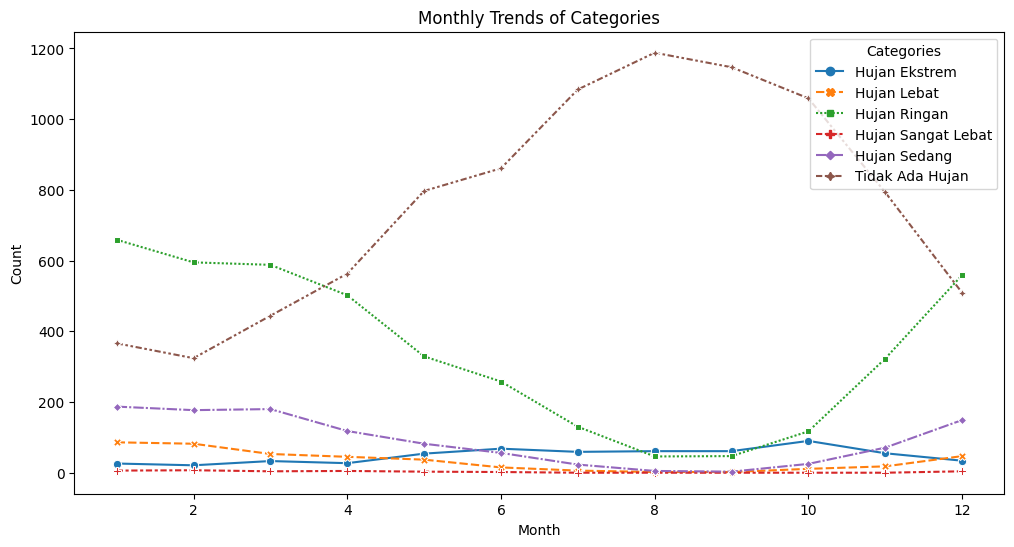

In [ ]:
# Assuming df is your DataFrame
df['Month'] = df['Tanggal'].dt.month

# Count the occurrences of each category per month
monthly_counts = df.groupby(['Month', 'Label']).size().unstack().fillna(0)

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, markers=True)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Trends of Categories')

# Adding legend
plt.legend(title='Categories', loc='upper right')

# Show the plot
plt.show()

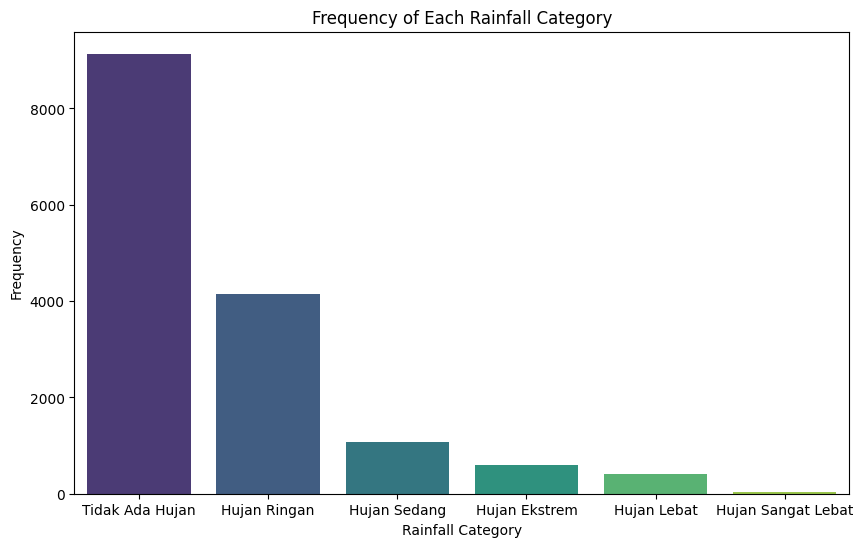

In [ ]:
# Assuming df is your DataFrame
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

# Plotting the frequency of each type of rain
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df, order=df['Label'].value_counts().index, palette='viridis')

# Adding labels and title
plt.xlabel('Rainfall Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Rainfall Category')

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

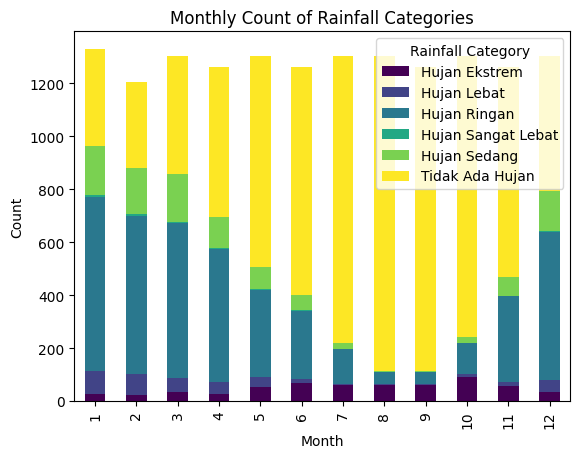

In [ ]:
# Assuming df is your DataFrame
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

# Create a pivot table to count the occurrences of each category per month
monthly_counts = df.groupby(['Month', 'Label']).size().unstack(fill_value=0)

# Plotting the stacked bar plot
plt.figure(figsize=(12, 8))
monthly_counts.plot(kind='bar', stacked=True, colormap='viridis')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Count of Rainfall Categories')

# Adding legend
plt.legend(title='Rainfall Category', loc='upper right')

# Show the plot
plt.show()

Pemodelan Hujan Ekstrem

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Mengubah format tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

# Menggunakan variabel Hujan_Ekstrem sebagai target
label_encoder = LabelEncoder()
df['Hujan_Ekstrem'] = label_encoder.fit_transform(df['Label'] == 'Hujan Ekstrem')

# Menggunakan variabel Tanggal sebagai fitur
X = df[['Tanggal']]

# Menggunakan variabel Hujan_Ekstrem sebagai target
y = df['Hujan_Ekstrem']

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Menguji model dengan data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy * 100))

# Membuat DataFrame untuk prediksi
tanggal_prediksi = pd.date_range(start='2018-04-01', end='2018-04-20')
df_prediksi = pd.DataFrame({'Tanggal': tanggal_prediksi})
df_prediksi['Prediksi_Hujan_Ekstrem'] = label_encoder.inverse_transform(model.predict(df_prediksi[['Tanggal']]))

# Menampilkan hasil prediksi
print(df_prediksi[['Tanggal', 'Prediksi_Hujan_Ekstrem']])

Akurasi model: 98.41%
      Tanggal  Prediksi_Hujan_Ekstrem
0  2018-04-01                   False
1  2018-04-02                   False
2  2018-04-03                    True
3  2018-04-04                    True
4  2018-04-05                    True
5  2018-04-06                   False
6  2018-04-07                   False
7  2018-04-08                   False
8  2018-04-09                   False
9  2018-04-10                   False
10 2018-04-11                    True
11 2018-04-12                    True
12 2018-04-13                    True
13 2018-04-14                   False
14 2018-04-15                   False
15 2018-04-16                    True
16 2018-04-17                    True
17 2018-04-18                    True
18 2018-04-19                    True
19 2018-04-20                   False


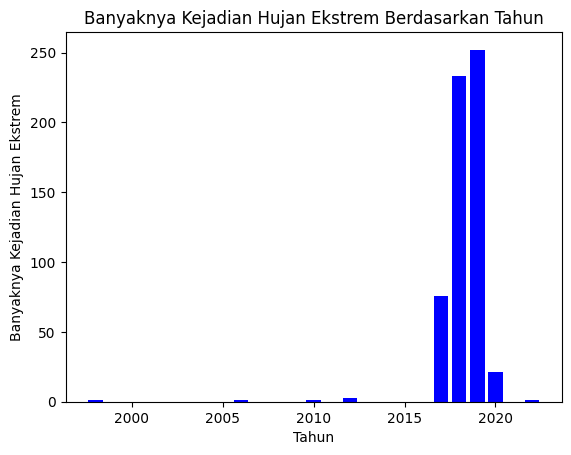

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming df is your DataFrame
data_tuples = [(row['Tanggal'], row['Label']) for _, row in df.iterrows()]

# Filtering data for extreme rain events
hujan_ekstrem = [date for date, rain in data_tuples if rain == 'Hujan Ekstrem']

# Counting the number of extreme rain events by year
counter = Counter(date.year for date in hujan_ekstrem)

# Creating a bar chart
years = list(counter.keys())
counts = list(counter.values())

plt.bar(years, counts, color='blue')
plt.xlabel('Tahun')
plt.ylabel('Banyaknya Kejadian Hujan Ekstrem')
plt.title('Banyaknya Kejadian Hujan Ekstrem Berdasarkan Tahun')
plt.show()